hello


In [51]:
import numpy as np
import pandas as pd

df=pd.read_csv("Hospital_Billing_Prediction.csv")
df.head()
df.shape



(966, 10)

In [52]:
df.dtypes
df.describe()



,Age,Length_of_Stay,Previous_Hospitalizations,Billing_Amount
count,932.000000,942.000000,966.000000,966.000000
mean,52.309013,15.161359,1.996894,25005.581781
std,21.009000,8.251073,1.418235,14655.301574
min,18.000000,1.000000,0.000000,502.000000
25%,34.000000,8.000000,1.000000,11545.250000
50%,52.000000,15.000000,2.000000,25228.500000
75%,71.000000,22.000000,3.000000,37448.000000
max,89.000000,29.000000,4.000000,49914.000000


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient_ID                 966 non-null    object 
 1   Age                        932 non-null    float64
 2   Gender                     966 non-null    object 
 3   Admission_Type             966 non-null    object 
 4   Length_of_Stay             942 non-null    float64
 5   Disease_Type               966 non-null    object 
 6   Previous_Hospitalizations  966 non-null    int64  
 7   Insurance_Type             623 non-null    object 
 8   Procedure_Type             966 non-null    object 
 9   Billing_Amount             966 non-null    int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 75.6+ KB


In [54]:
df.isnull().sum()

,0
Patient_ID,0
Age,34
Gender,0
Admission_Type,0
Length_of_Stay,24
Disease_Type,0
Previous_Hospitalizations,0
Insurance_Type,343
Procedure_Type,0
Billing_Amount,0


In [57]:
print(df.columns)
# Remove unwanted columns
df.drop(columns='Patient_ID',inplace=True)  # specify the columns to remove

Index(['Patient_ID', 'Age', 'Gender', 'Admission_Type', 'Length_of_Stay',
       'Disease_Type', 'Previous_Hospitalizations', 'Insurance_Type',
       'Procedure_Type', 'Billing_Amount'],
      dtype='object')


In [58]:
print(df.columns)
df.isnull().sum()

Index(['Age', 'Gender', 'Admission_Type', 'Length_of_Stay', 'Disease_Type',
       'Previous_Hospitalizations', 'Insurance_Type', 'Procedure_Type',
       'Billing_Amount'],
      dtype='object')


,0
Age,34
Gender,0
Admission_Type,0
Length_of_Stay,24
Disease_Type,0
Previous_Hospitalizations,0
Insurance_Type,343
Procedure_Type,0
Billing_Amount,0


In [59]:

num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

In [60]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())

df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])


In [61]:
print(num_columns)

Index(['Age', 'Length_of_Stay', 'Previous_Hospitalizations', 'Billing_Amount'], dtype='object')


In [62]:
print(cat_columns)

Index(['Gender', 'Admission_Type', 'Disease_Type', 'Insurance_Type',
       'Procedure_Type'],
      dtype='object')


In [63]:
df.isnull().sum()

,0
Age,0
Gender,0
Admission_Type,0
Length_of_Stay,0
Disease_Type,0
Previous_Hospitalizations,0
Insurance_Type,0
Procedure_Type,0
Billing_Amount,0


In [64]:
# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [65]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [66]:
df.head(10)

,Age,Gender,Admission_Type,Length_of_Stay,Disease_Type,Previous_Hospitalizations,Insurance_Type,Procedure_Type,Billing_Amount
0,0.042254,0,2,0.857143,2,1.00,1,3,0.709180
1,0.760563,0,1,0.750000,1,0.75,1,3,0.602930
2,0.338028,1,1,0.714286,4,0.00,1,1,0.627196
3,0.464789,1,0,0.178571,0,1.00,0,1,0.378957
4,0.676056,1,1,0.505763,1,0.75,0,2,0.499433
5,0.183099,0,2,0.821429,4,0.50,0,2,0.053530
6,1.000000,1,0,0.750000,0,0.75,0,3,0.262831
7,0.394366,1,2,0.535714,4,0.75,0,1,0.411884
8,0.647887,1,1,0.214286,2,0.75,0,1,0.016433
9,0.901408,0,0,0.714286,1,1.00,0,1,0.480329


In [67]:
# Split data into train and test sets
# replace 'target_column' with your target column name
X = df.drop('Billing_Amount', axis=1)  # -- independent variable
y = df['Billing_Amount'] # -- dependent variable

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:

from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression()

In [71]:
# Evaluate Logistic Regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linreg_pred = linreg_model.predict(X_test)
# Evaluation metrics
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)

In [72]:
print(f'Mean Squared Error: {linreg_mse}')
print(f'Mean Absolute Error: {linreg_mae}')
print(f'R-squared: {linreg_r2}')

Mean Squared Error: 0.07797846031059653
Mean Absolute Error: 0.23817843875580821
R-squared: -0.02540708186776608


In [73]:
#Train Random Forest Classifier model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [74]:
# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [75]:
print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'R-squared: {rf_r2}')

Mean Squared Error: 0.08818257000580053
Mean Absolute Error: 0.25220907563670414
R-squared: -0.15958985880310173


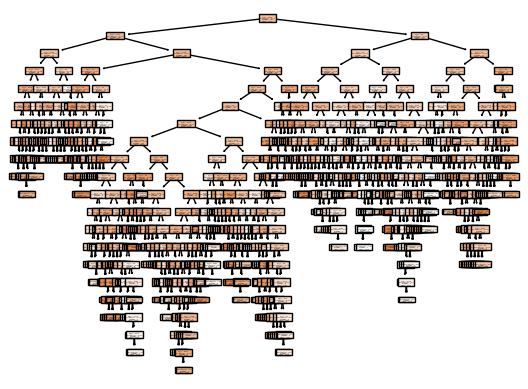

In [76]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [77]:
# Select the best model
best_model = linreg_model if linreg_mse < rf_mse else rf_model

In [78]:
# Save the best model as a .pkl file
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'
